#**Face Recognition Model By NI_AI_Suprith Shettigar**

**Importing libraries:**

In [26]:
#importing the libraries:
import cv2 #used for powerful library for computer vision and image processing tasks. ( like :  face detection and image filtering )
import numpy as np #used for basic array operations and numerical data handling.
from IPython.display import display, Javascript, Image #used to display the output of the camera.
from google.colab.output import eval_js #used for taking the photo and storing the information,
from base64 import b64decode, b64encode #used for decoding and checking the format of the image.
import PIL #used for creating a PIL image from the binary data.

In [13]:
# function to convert the JavaScript object into an OpenCV image

def js_to_image(js_reply):

  #input: js_reply: JavaScript object contains image from webcam.
  # decode base64 image by using split method.
  image_bytes = b64decode(js_reply.split(',')[1])

  # convert bytes to numpy array and store it as "jpg_as_np".
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)

  # decode numpy array into OpenCV BGR image and save it as img.
  img = cv2.imdecode(jpg_as_np, flags=1)

  #Returns:  img: OpenCV BGR image
  return img

In [14]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):

  #input: bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()

  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')

  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  #Returns: bytes: Base64 image byte string
  return bbox_bytes

In [15]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [20]:
#function to create the file to capture the photo.
#{default colab program. for camera capture}
#can be inserted from code snippets.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

  display(js)

  # getting photo data
  data = eval_js('takePhoto({})'.format(quality))
  # gets OpenCV format image
  img = js_to_image(data)
  # img is converted to a grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade detection model.
  faces = face_cascade.detectMultiScale(gray)
  # draws a face bounding box on image with purple color.
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(128,0,128),2)
  # save image
  cv2.imwrite(filename, img)

  #returns the file
  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


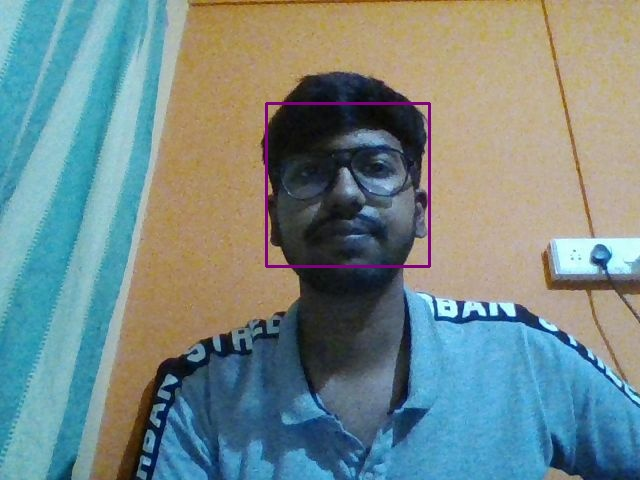

In [25]:
#trys executing the program:
try:
  #saves the filename as photo.jpg
  filename = take_photo('photo.jpg')
  #formats tbe filename
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))

#Occurs when there is an exception:
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))